# Nader Nageh (X1535)
# Esraa Ahmed (X1746)
# Nourhan fathy (X2459)

# Import libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import missingno as msno

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

####Importing dataset 

In [2]:

data = pd.read_csv("heart_2020_cleaned.csv")
data = pd.DataFrame(data)
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.shape

(319795, 18)


# visualization

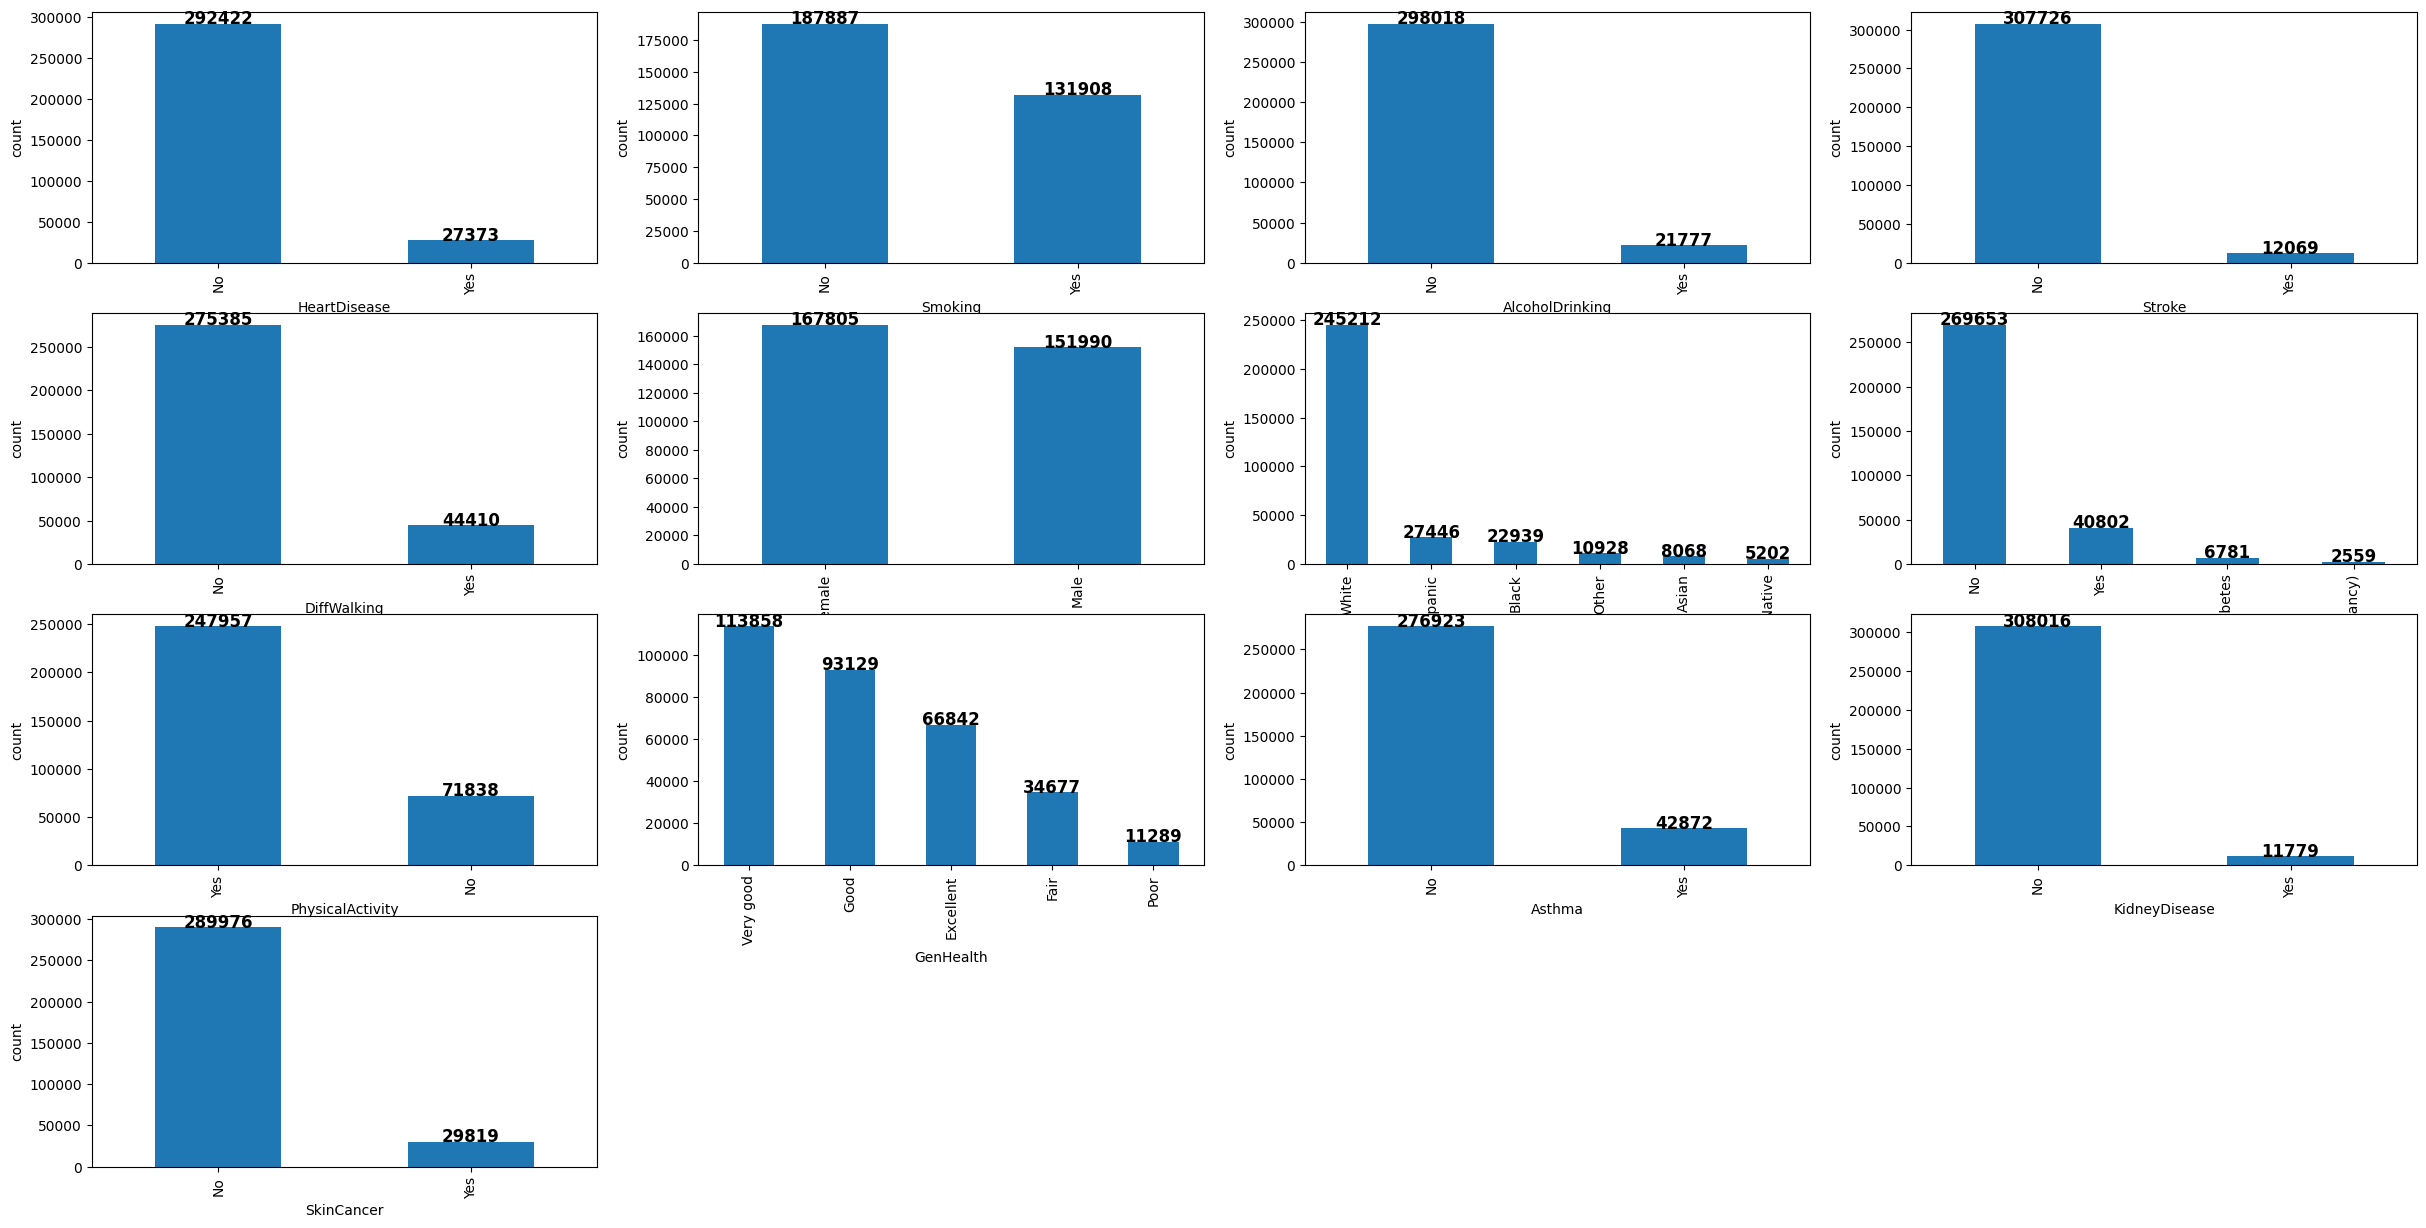

In [5]:
# Categorical Data

cat = data.select_dtypes(include='object').columns
len(cat)

# Bar plotting for categorical values
if (len(cat) <= 4 ) :#on one line  # to adjust figure size
    plt.figure(figsize = (30,7))
else:
    plt.figure(figsize = (30,15))
rows = len(cat)//4
cat_bar = []
for i in cat :
    if len(data[i].unique())<=10:
        cat_bar.append(i)        
for index , i in enumerate(cat_bar):
    ax = plt.subplot( rows+1 , 4, index+1)
    (data[i].value_counts()).plot.bar()
    ax.set_xlabel(i)
    ax.set_ylabel("count")
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        ax.text(loc+width/2, height, str(height), fontsize=12, weight='bold', ha='center')
        
plt.show();

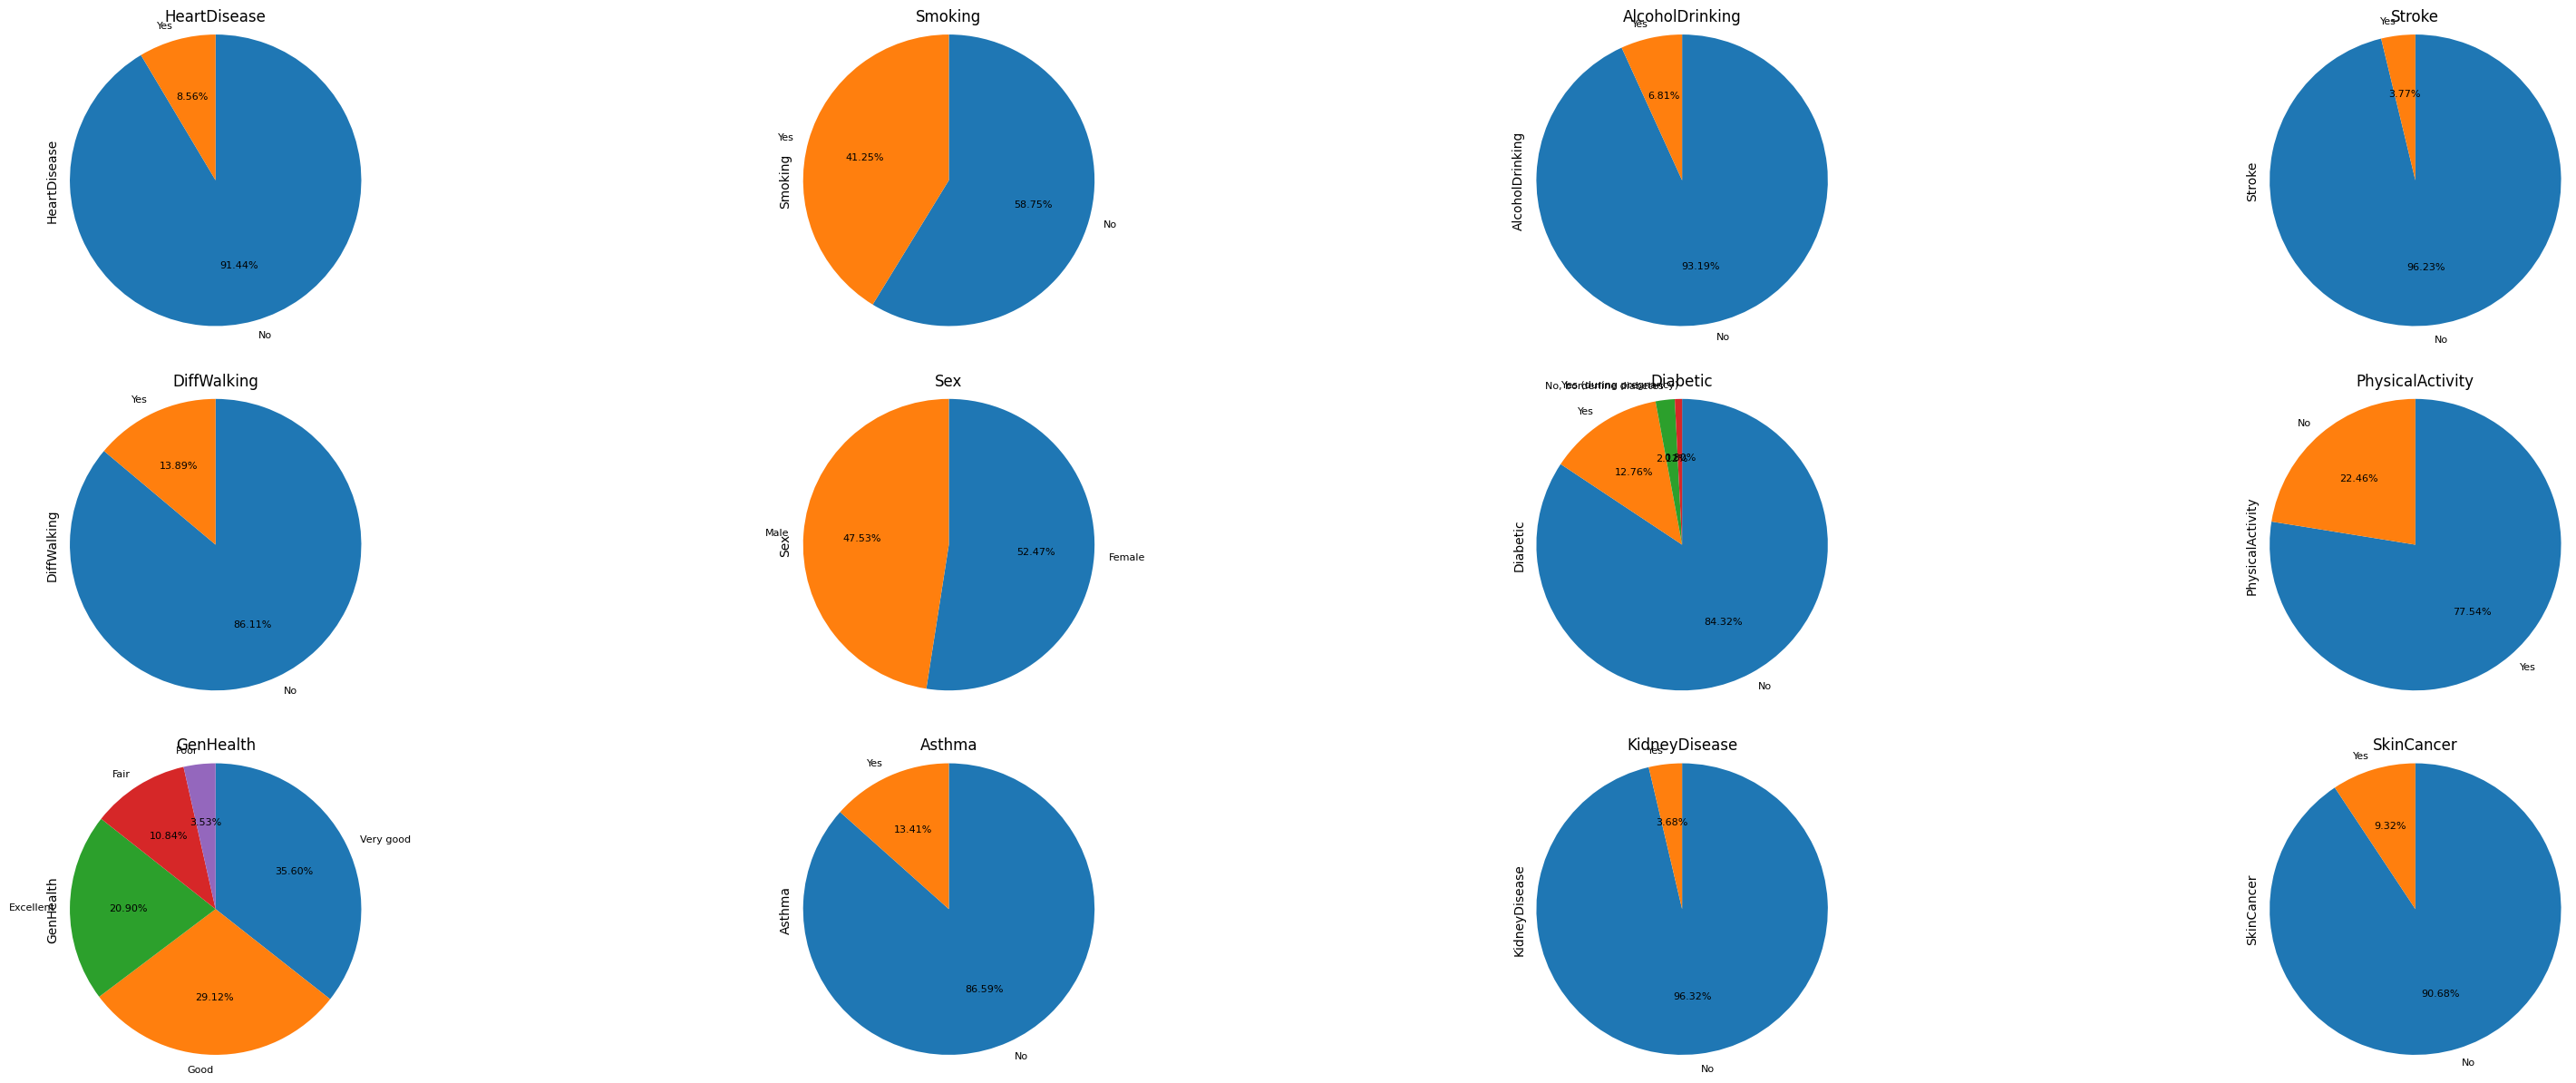

In [6]:
# Pie plots for categorical values
plt.figure(figsize = (40,20))
rows = len(cat)//4
cat_pie = []
for i in (cat) :
    if len(data[i].unique())<=5: # we want to draw pie for columns with min unique values = 5
        cat_pie.append(i)

for index , i in enumerate(cat_pie):
    ax = plt.subplot( rows+1 , 4, index+1)
    val_count = data[i].value_counts()
    (data[i].value_counts()).plot.pie(autopct='%.2f%%',labels=val_count.index,startangle=90,counterclock=False , radius=1.2, textprops={'fontsize':8})
    plt.title(i)
plt.show() 

In [7]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

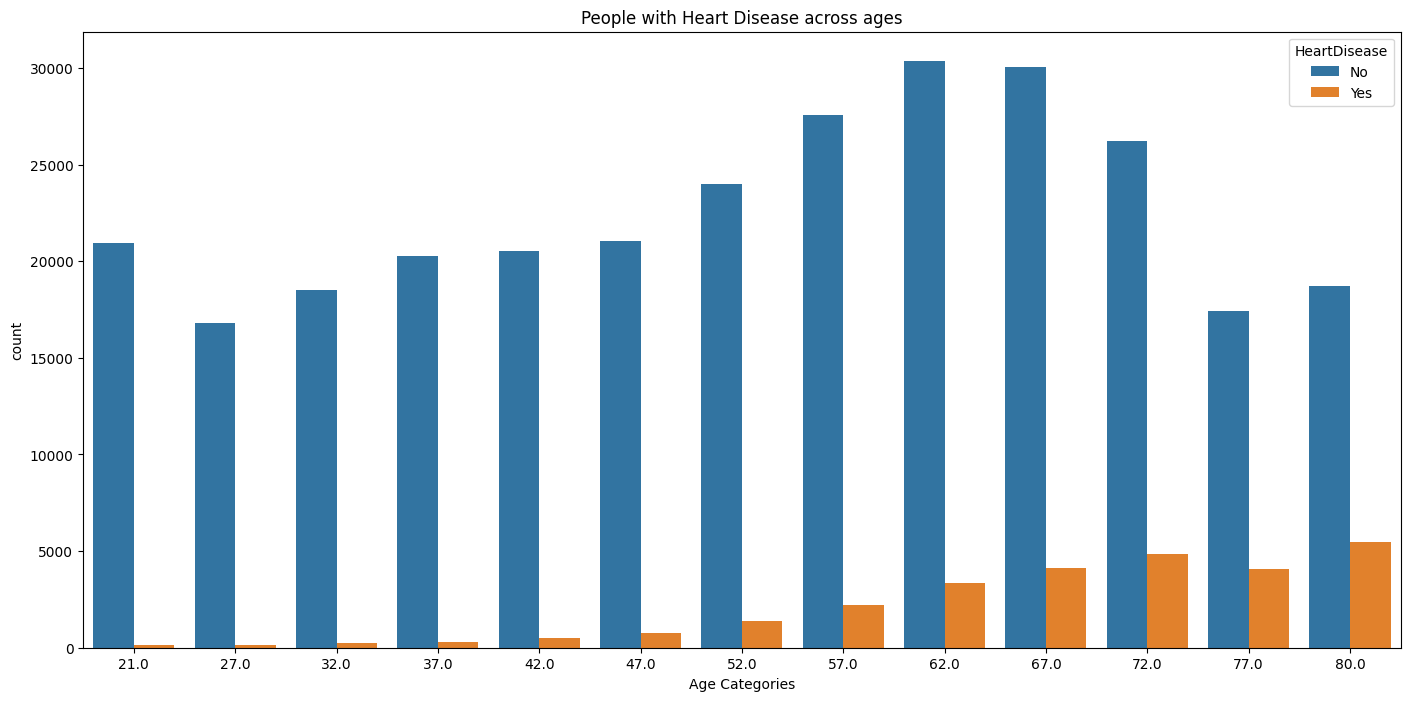

In [8]:


# Get unique values of agecategory and sort it
order = pd.unique(data.AgeCategory.values)
order.sort()

# Set the figure size
plt.figure(figsize=(17, 8))

# Draw the countplot of agecategory and heartdisease
sns.countplot(data=data, x='AgeCategory', hue='HeartDisease', order=order)

# Set the title of the plot
plt.title('People with Heart Disease across ages')

# Set the x-axis label
plt.xlabel('Age Categories')

# Show the plot
plt.show()

# Data Cleaning & Preprocessing

In [9]:
print(data.isnull().sum()) 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [10]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [11]:
print('\nCategorical Columns\n')
data.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

In [12]:

for col in data.columns:
    print(data[col].unique())
    print('----------------')

['No' 'Yes']
----------------
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
----------------
['Yes' 'No']
----------------
['No' 'Yes']
----------------
['No' 'Yes']
----------------
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
----------------
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
----------------
['No' 'Yes']
----------------
['Female' 'Male']
----------------
[57. 80. 67. 77. 42. 72. 62. 52. 47. 21. 37. 32. 27.]
----------------
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
----------------
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
----------------
['Yes' 'No']
----------------
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
----------------
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
----------------
['Yes' 'No

###Encoding Categorical Attributes

In [13]:
print(data["Diabetic"].unique())

['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [14]:

data['HeartDisease'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)



data['Smoking'].replace(['Yes', 'No'],
                        [1,0], inplace=True)


data['AlcoholDrinking'].replace(['Yes', 'No'],
                        [1,0], inplace=True)


data['Stroke'].replace(['Yes', 'No'],
                        [1,0], inplace=True)




data['DiffWalking'].replace(['Yes', 'No'],
                        [1,0], inplace=True)

data['Sex'].replace(['Female', 'Male'],
                        [1,0], inplace=True)

# data['Race'].replace(['White', 'Black'],
#                         [1,0], inplace=True)


data['Diabetic'].replace(['Yes', 'No' , 'No, borderline diabetes', 'Yes (during pregnancy)' ],
                        [1 , 0, 0, 1 ], inplace=True)


data['PhysicalActivity'].replace(['Yes', 'No'],
                        [1,0], inplace=True)

data['Asthma'].replace(['Yes', 'No'],
                        [1,0], inplace=True)



data['KidneyDisease'].replace(['Yes', 'No'],
                        [1,0], inplace=True)


data['SkinCancer'].replace(['Yes', 'No'],
                        [1,0], inplace=True)



In [15]:
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
235388,0,26.63,0,0,0,0.0,4.0,0,1,77.0,White,0,1,Very good,8.0,0,0,1
169907,0,26.22,0,0,0,0.0,0.0,0,1,72.0,White,0,1,Excellent,8.0,0,0,0
93668,0,26.39,0,0,0,0.0,0.0,0,0,37.0,White,0,1,Very good,7.0,0,0,0
173659,0,30.85,0,0,0,0.0,10.0,0,1,21.0,White,0,1,Good,6.0,0,0,0
67204,0,21.61,0,0,0,0.0,0.0,0,1,57.0,Asian,0,1,Good,6.0,0,0,0
9802,0,28.25,0,0,0,0.0,2.0,0,1,52.0,White,0,1,Very good,7.0,0,0,0
62816,0,25.07,0,0,0,0.0,0.0,0,0,37.0,White,0,1,Good,8.0,0,0,0
147538,0,33.89,0,0,0,3.0,3.0,0,1,52.0,Other,0,1,Good,8.0,1,0,0
46136,0,24.19,0,0,0,0.0,0.0,0,1,77.0,White,0,1,Excellent,7.0,0,0,0
152320,0,18.40,0,0,0,0.0,0.0,0,1,21.0,Black,0,0,Very good,8.0,0,0,0


In [16]:
for col in data.columns:
    print(data[col].unique())
    print('----------------')

[0 1]
----------------
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
----------------
[1 0]
----------------
[0 1]
----------------
[0 1]
----------------
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
----------------
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
----------------
[0 1]
----------------
[1 0]
----------------
[57. 80. 67. 77. 42. 72. 62. 52. 47. 21. 37. 32. 27.]
----------------
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
----------------
[1 0]
----------------
[1 0]
----------------
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
----------------
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
----------------
[1 0]
----------------
[0 1]
----------------
[1 0]
----------------


In [17]:
data['Race'].replace( 'White',1,inplace=True)
data['Race'].replace( 'Black',2,inplace=True)
data['Race'].replace( 'Asian',3,inplace=True)
data['Race'].replace( 'American Indian/Alaskan Native',4,inplace=True)
data['Race'].replace( 'Hispanic',5,inplace=True)
data['Race'].replace( 'Other',6,inplace=True)

In [18]:
data['GenHealth'].replace( 'Poor',1,inplace=True)
data['GenHealth'].replace( 'Fair',2,inplace=True)
data['GenHealth'].replace( 'Good',3,inplace=True)
data['GenHealth'].replace( 'Very good',4,inplace=True)
data['GenHealth'].replace( 'Excellent',5,inplace=True)

In [19]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,57.0,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80.0,1,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,67.0,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,77.0,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,42.0,1,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,62.0,5,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,37.0,5,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,47.0,5,0,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,27.0,5,0,0,3,12.0,0,0,0


In [20]:
data.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


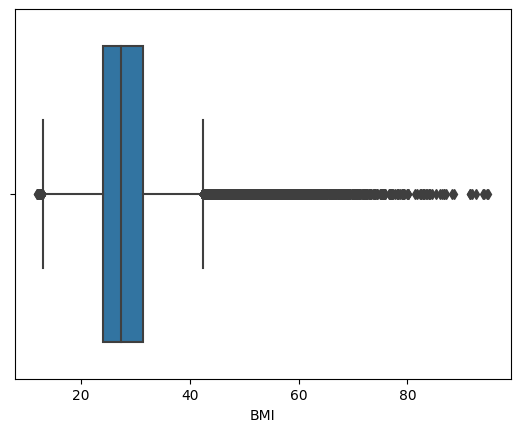

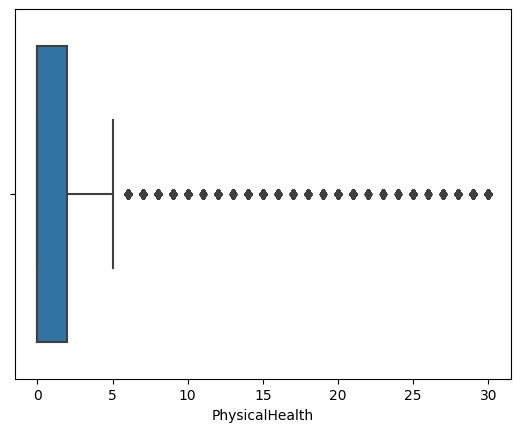

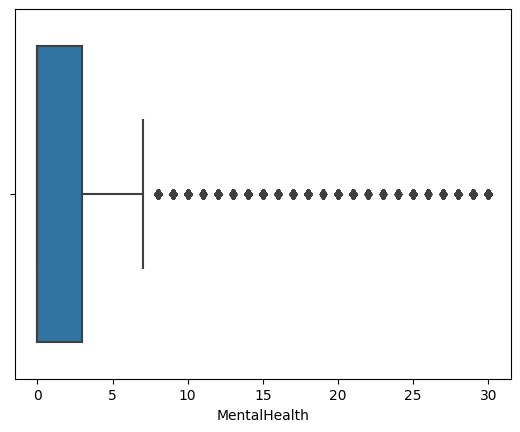

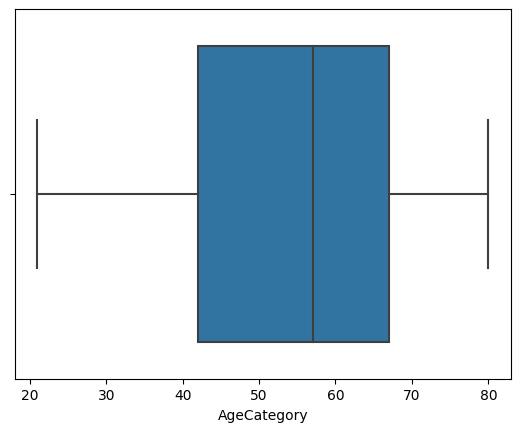

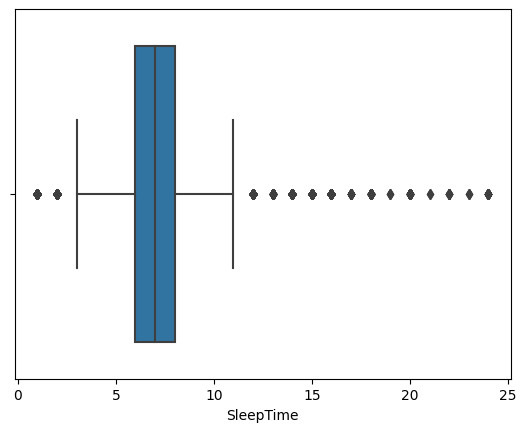

In [21]:
sns.boxplot(x = data['BMI'])
plt.show()
sns.boxplot(x = data['PhysicalHealth'])
plt.show()
sns.boxplot(x = data['MentalHealth'])
plt.show()
sns.boxplot(x = data['AgeCategory'])
plt.show()
sns.boxplot(x = data['SleepTime'])
plt.show()

<AxesSubplot:>

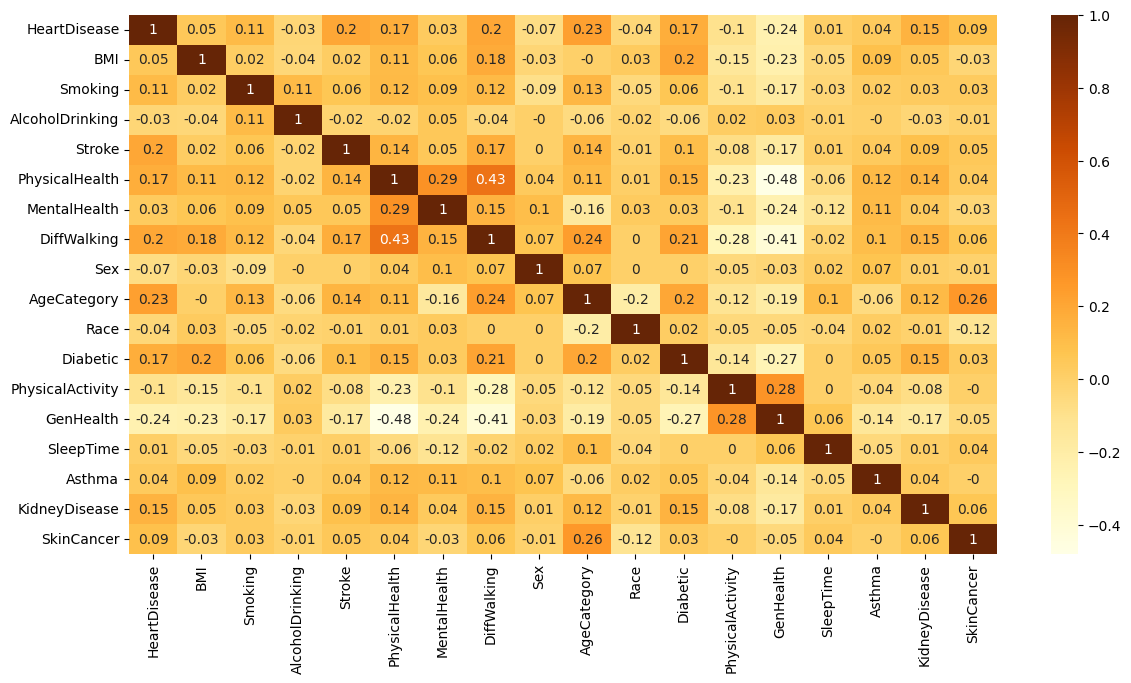

In [22]:
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')


# train test split

In [23]:
y = data['HeartDisease']
X = data.drop(['HeartDisease'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )


In [24]:
X_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
215723,29.26,1,0,0,0.0,0.0,0,1,42.0,1,0,1,4,8.0,0,0,0
153974,32.10,1,0,0,0.0,0.0,0,0,57.0,1,0,1,3,7.0,0,0,0
267662,33.84,1,0,0,2.0,10.0,0,1,42.0,1,0,0,3,6.0,0,0,0
249687,33.28,0,0,0,0.0,0.0,0,1,80.0,1,1,1,3,8.0,1,1,1
235060,29.65,0,0,0,0.0,0.0,0,0,77.0,1,1,0,4,8.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190625,27.98,1,1,0,0.0,0.0,0,1,52.0,5,0,1,4,7.0,0,0,0
243150,26.58,0,0,0,0.0,0.0,1,0,80.0,1,0,0,3,7.0,0,1,0
258843,35.26,1,0,0,0.0,0.0,0,0,42.0,1,0,1,4,7.0,0,0,0
205209,24.96,1,0,0,0.0,0.0,0,1,72.0,2,0,1,3,7.0,1,0,0


In [25]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [26]:
y_pred=clf.predict(X_test)
from sklearn import metrics
print("MAE : " , metrics.mean_absolute_error(y_test,y_pred))
print("MSE : " , metrics.mean_squared_error(y_test,y_pred))
print("RMAE : " , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print("R2 : " , metrics.r2_score(y_test,y_pred))

MAE :  0.09379446207726826
MSE :  0.09379446207726826
RMAE :  0.30625881550947764
R2 :  -0.18942941184056372


In [27]:
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58439
           1       0.37      0.13      0.19      5520

    accuracy                           0.91     63959
   macro avg       0.65      0.55      0.57     63959
weighted avg       0.88      0.91      0.88     63959



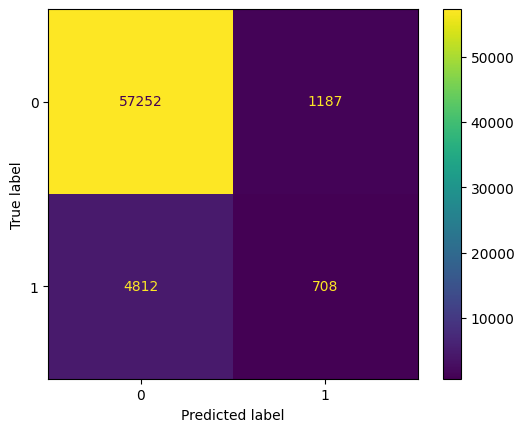

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()